In [124]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.utils import Bunch
from sklearn.model_selection import train_test_split, KFold
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder, StandardScaler

LOADING THE DATASET

In [125]:
path = r'C:\Users\ASUS\Desktop\jupyter projects\dataset1.csv'
ddos = pd.read_csv(path)
ddos_bunch = Bunch(data=ddos.values, feature_names=ddos.columns, target='Label')

In [126]:
ddos.head()

,flow_duration,protocol,srcport,dstport,byte_count,packet_count,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,...,Fwd Header Len,Bwd Header Len,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,Pkt Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Label
0,274,1,0,0,26656,272,2,31,46,21.92031,...,40,40,541.8000,0,0,0,30.750000,-1,64240,0
1,274,1,0,0,26656,272,2,31,46,21.92031,...,40,40,541.8000,0,0,0,30.750000,-1,64240,0
2,29,1,0,0,2842,29,1,0,0,0.00000,...,40,20,0.0000,0,0,0,0.000000,-1,64240,0
3,29,1,0,0,2842,29,1,0,0,0.00000,...,40,20,0.0000,0,0,0,0.000000,-1,64240,0
4,218,6,46004,80,246238678,29823,8,2556,5188,700.40217,...,100,160,441000.7473,0,0,0,693.692308,-1,64240,0


EDA (EXPLORATORY DATA ANALYRSIS)

In [127]:
ddos.shape

(113407, 25)

In [128]:
print(ddos['Label'].unique())  # Check actual values before conversion
print(ddos.info()) 

[0 1]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113407 entries, 0 to 113406
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   flow_duration      113407 non-null  int64  
 1   protocol           113407 non-null  int64  
 2   srcport            113407 non-null  int64  
 3   dstport            113407 non-null  int64  
 4   byte_count         113407 non-null  int64  
 5   packet_count       113407 non-null  int64  
 6   Tot Bwd Pkts       113407 non-null  int64  
 7   TotLen Fwd Pkts    113407 non-null  int64  
 8   TotLen Bwd Pkts    113407 non-null  int64  
 9   Fwd Pkt Len Std    113407 non-null  float64
 10  Flow Pkts/s        113407 non-null  float64
 11  Fwd PSH Flags      113407 non-null  int64  
 12  Bwd PSH Flags      113407 non-null  int64  
 13  Fwd URG Flags      113407 non-null  int64  
 14  Bwd URG Flags      113407 non-null  int64  
 15  Fwd Header Len     113407 non-null  int64  
 

In [129]:
type(ddos)

pandas.core.frame.DataFrame

In [130]:
type(ddos_bunch)

sklearn.utils._bunch.Bunch

In [131]:
ddos_bunch.keys()

dict_keys(['data', 'feature_names', 'target'])

In [132]:
print(ddos_bunch.data)

[[ 2.740e+02  1.000e+00  0.000e+00 ... -1.000e+00  6.424e+04  0.000e+00]
 [ 2.740e+02  1.000e+00  0.000e+00 ... -1.000e+00  6.424e+04  0.000e+00]
 [ 2.900e+01  1.000e+00  0.000e+00 ... -1.000e+00  6.424e+04  0.000e+00]
 ...
 [ 1.600e+01  0.000e+00  0.000e+00 ... -1.000e+00 -1.000e+00  1.000e+00]
 [ 2.000e+01  0.000e+00  0.000e+00 ... -1.000e+00 -1.000e+00  1.000e+00]
 [ 2.500e+01  0.000e+00  0.000e+00 ... -1.000e+00 -1.000e+00  1.000e+00]]


In [133]:
print(ddos_bunch.feature_names)

Index(['flow_duration', 'protocol', 'srcport', 'dstport', 'byte_count',
       'packet_count', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Std', 'Flow Pkts/s', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'Pkt Size Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Label'],
      dtype='object')


In [134]:
ddos.keys()

Index(['flow_duration', 'protocol', 'srcport', 'dstport', 'byte_count',
       'packet_count', 'Tot Bwd Pkts', 'TotLen Fwd Pkts', 'TotLen Bwd Pkts',
       'Fwd Pkt Len Std', 'Flow Pkts/s', 'Fwd PSH Flags', 'Bwd PSH Flags',
       'Fwd URG Flags', 'Bwd URG Flags', 'Fwd Header Len', 'Bwd Header Len',
       'Pkt Len Var', 'FIN Flag Cnt', 'SYN Flag Cnt', 'RST Flag Cnt',
       'Pkt Size Avg', 'Init Fwd Win Byts', 'Init Bwd Win Byts', 'Label'],
      dtype='object')

In [135]:
ddos

,flow_duration,protocol,srcport,dstport,byte_count,packet_count,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,...,Fwd Header Len,Bwd Header Len,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,Pkt Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Label
0,274,1,0,0,26656,272,2,31,46,21.92031,...,40,40,541.8000,0,0,0,30.750000,-1,64240,0
1,274,1,0,0,26656,272,2,31,46,21.92031,...,40,40,541.8000,0,0,0,30.750000,-1,64240,0
2,29,1,0,0,2842,29,1,0,0,0.00000,...,40,20,0.0000,0,0,0,0.000000,-1,64240,0
3,29,1,0,0,2842,29,1,0,0,0.00000,...,40,20,0.0000,0,0,0,0.000000,-1,64240,0
4,218,6,46004,80,246238678,29823,8,2556,5188,700.40217,...,100,160,441000.7473,0,0,0,693.692308,-1,64240,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113402,71,0,0,0,0,0,2,0,0,0.00000,...,0,0,0.0000,0,0,0,0.000000,-1,-1,1
113403,72,0,0,0,0,0,2,0,0,0.00000,...,0,0,0.0000,0,0,0,0.000000,-1,-1,1
113404,16,0,0,0,0,0,2,0,0,0.00000,...,0,0,0.0000,0,0,0,0.000000,-1,-1,1
113405,20,0,0,0,0,0,2,0,0,0.00000,...,0,0,0.0000,0,0,0,0.000000,-1,-1,1


In [136]:
print(ddos.dtypes)

flow_duration          int64
protocol               int64
srcport                int64
dstport                int64
byte_count             int64
packet_count           int64
Tot Bwd Pkts           int64
TotLen Fwd Pkts        int64
TotLen Bwd Pkts        int64
Fwd Pkt Len Std      float64
Flow Pkts/s          float64
Fwd PSH Flags          int64
Bwd PSH Flags          int64
Fwd URG Flags          int64
Bwd URG Flags          int64
Fwd Header Len         int64
Bwd Header Len         int64
Pkt Len Var          float64
FIN Flag Cnt           int64
SYN Flag Cnt           int64
RST Flag Cnt           int64
Pkt Size Avg         float64
Init Fwd Win Byts      int64
Init Bwd Win Byts      int64
Label                  int64
dtype: object


In [137]:
ddos = ddos.astype({col: 'float64' for col in ddos.select_dtypes(include=['int64']).columns})
ddos['Label'] = pd.to_numeric(ddos['Label'], errors='coerce')  #setting errors='coerce' to handle any unexpected values
print(ddos['Label'].unique())  #Should contain only numeric values
print(ddos.dtypes)  #'Label' should now be float64

[0. 1.]
flow_duration        float64
protocol             float64
srcport              float64
dstport              float64
byte_count           float64
packet_count         float64
Tot Bwd Pkts         float64
TotLen Fwd Pkts      float64
TotLen Bwd Pkts      float64
Fwd Pkt Len Std      float64
Flow Pkts/s          float64
Fwd PSH Flags        float64
Bwd PSH Flags        float64
Fwd URG Flags        float64
Bwd URG Flags        float64
Fwd Header Len       float64
Bwd Header Len       float64
Pkt Len Var          float64
FIN Flag Cnt         float64
SYN Flag Cnt         float64
RST Flag Cnt         float64
Pkt Size Avg         float64
Init Fwd Win Byts    float64
Init Bwd Win Byts    float64
Label                float64
dtype: object


In [138]:
ddos = ddos[ddos['Label']!='Label']  #Drop rows where Label is literally 'Label'

In [139]:
ddos.describe()

,flow_duration,protocol,srcport,dstport,byte_count,packet_count,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,...,Fwd Header Len,Bwd Header Len,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,Pkt Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Label
count,1.134070e+05,113407.000000,113407.000000,113407.000000,1.134070e+05,113407.000000,113407.000000,1.134070e+05,1.134070e+05,113407.000000,...,113407.000000,113407.000000,1.134070e+05,113407.000000,113407.000000,113407.000000,113407.000000,113407.0,113407.000000,113407.000000
mean,5.675157e+06,4.205825,13404.874496,3942.364598,3.149522e+05,138.744257,8.995829,1.607594e+03,1.710389e+04,54.413657,...,96.797658,152.417223,4.192369e+05,0.010555,0.073320,0.000265,103.779678,-1.0,11279.700830,0.621725
std,2.290923e+07,6.446244,21656.132359,13247.903299,8.064643e+06,1847.267425,156.940094,1.211427e+05,4.905401e+05,424.427145,...,1842.412823,3271.544343,7.155128e+06,0.102194,0.260662,0.016262,336.603800,0.0,24353.898653,0.484959
min,-1.540000e+02,0.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.0,-1.000000,0.000000
25%,1.700000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.0,-1.000000,0.000000
50%,3.600000e+01,0.000000,0.000000,0.000000,0.000000e+00,0.000000,2.000000,0.000000e+00,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,-1.0,-1.000000,1.000000
75%,3.325000e+03,6.000000,36313.000000,53.000000,3.300000e+01,1.000000,3.000000,3.300000e+01,1.780000e+02,0.000000,...,8.000000,24.000000,9.618800e+03,0.000000,0.000000,0.000000,123.750000,-1.0,-1.000000,1.000000
max,1.200000e+08,17.000000,65513.000000,60994.000000,3.581997e+08,63196.000000,34094.000000,3.160000e+07,1.070000e+08,45423.832520,...,360448.000000,681904.000000,9.830000e+08,1.000000,1.000000,1.000000,21413.000000,-1.0,65535.000000,1.000000


In [140]:
ddos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113407 entries, 0 to 113406
Data columns (total 25 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   flow_duration      113407 non-null  float64
 1   protocol           113407 non-null  float64
 2   srcport            113407 non-null  float64
 3   dstport            113407 non-null  float64
 4   byte_count         113407 non-null  float64
 5   packet_count       113407 non-null  float64
 6   Tot Bwd Pkts       113407 non-null  float64
 7   TotLen Fwd Pkts    113407 non-null  float64
 8   TotLen Bwd Pkts    113407 non-null  float64
 9   Fwd Pkt Len Std    113407 non-null  float64
 10  Flow Pkts/s        113407 non-null  float64
 11  Fwd PSH Flags      113407 non-null  float64
 12  Bwd PSH Flags      113407 non-null  float64
 13  Fwd URG Flags      113407 non-null  float64
 14  Bwd URG Flags      113407 non-null  float64
 15  Fwd Header Len     113407 non-null  float64
 16  Bw

In [141]:
ddos.isnull()

,flow_duration,protocol,srcport,dstport,byte_count,packet_count,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,...,Fwd Header Len,Bwd Header Len,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,Pkt Size Avg,Init Fwd Win Byts,Init Bwd Win Byts,Label
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113402,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113403,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113404,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
113405,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [142]:
ddos.isnull().sum()

flow_duration        0
protocol             0
srcport              0
dstport              0
byte_count           0
packet_count         0
Tot Bwd Pkts         0
TotLen Fwd Pkts      0
TotLen Bwd Pkts      0
Fwd Pkt Len Std      0
Flow Pkts/s          0
Fwd PSH Flags        0
Bwd PSH Flags        0
Fwd URG Flags        0
Bwd URG Flags        0
Fwd Header Len       0
Bwd Header Len       0
Pkt Len Var          0
FIN Flag Cnt         0
SYN Flag Cnt         0
RST Flag Cnt         0
Pkt Size Avg         0
Init Fwd Win Byts    0
Init Bwd Win Byts    0
Label                0
dtype: int64

In [143]:
for col in ddos.columns:
    print(f"{col}: {ddos[col].nunique()} unique values")

flow_duration: 22926 unique values
protocol: 4 unique values
srcport: 16515 unique values
dstport: 7173 unique values
byte_count: 2585 unique values
packet_count: 1210 unique values
Tot Bwd Pkts: 582 unique values
TotLen Fwd Pkts: 3945 unique values
TotLen Bwd Pkts: 5811 unique values
Fwd Pkt Len Std: 6736 unique values
Flow Pkts/s: 25546 unique values
Fwd PSH Flags: 1 unique values
Bwd PSH Flags: 2 unique values
Fwd URG Flags: 1 unique values
Bwd URG Flags: 1 unique values
Fwd Header Len: 483 unique values
Bwd Header Len: 816 unique values
Pkt Len Var: 9398 unique values
FIN Flag Cnt: 2 unique values
SYN Flag Cnt: 2 unique values
RST Flag Cnt: 2 unique values
Pkt Size Avg: 8490 unique values
Init Fwd Win Byts: 1 unique values
Init Bwd Win Byts: 123 unique values
Label: 2 unique values


In [144]:
### DEPENDENT and INDEPENDENT Features
X=ddos.iloc[:, :-1]
y=ddos.iloc[:, -1]

In [145]:
X.head()

,flow_duration,protocol,srcport,dstport,byte_count,packet_count,Tot Bwd Pkts,TotLen Fwd Pkts,TotLen Bwd Pkts,Fwd Pkt Len Std,...,Bwd URG Flags,Fwd Header Len,Bwd Header Len,Pkt Len Var,FIN Flag Cnt,SYN Flag Cnt,RST Flag Cnt,Pkt Size Avg,Init Fwd Win Byts,Init Bwd Win Byts
0,274.0,1.0,0.0,0.0,26656.0,272.0,2.0,31.0,46.0,21.92031,...,0.0,40.0,40.0,541.8000,0.0,0.0,0.0,30.750000,-1.0,64240.0
1,274.0,1.0,0.0,0.0,26656.0,272.0,2.0,31.0,46.0,21.92031,...,0.0,40.0,40.0,541.8000,0.0,0.0,0.0,30.750000,-1.0,64240.0
2,29.0,1.0,0.0,0.0,2842.0,29.0,1.0,0.0,0.0,0.00000,...,0.0,40.0,20.0,0.0000,0.0,0.0,0.0,0.000000,-1.0,64240.0
3,29.0,1.0,0.0,0.0,2842.0,29.0,1.0,0.0,0.0,0.00000,...,0.0,40.0,20.0,0.0000,0.0,0.0,0.0,0.000000,-1.0,64240.0
4,218.0,6.0,46004.0,80.0,246238678.0,29823.0,8.0,2556.0,5188.0,700.40217,...,0.0,100.0,160.0,441000.7473,0.0,0.0,0.0,693.692308,-1.0,64240.0


In [146]:
y.head()

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
Name: Label, dtype: float64

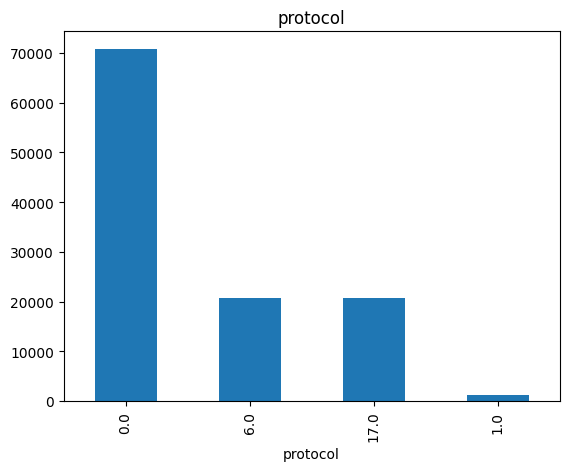

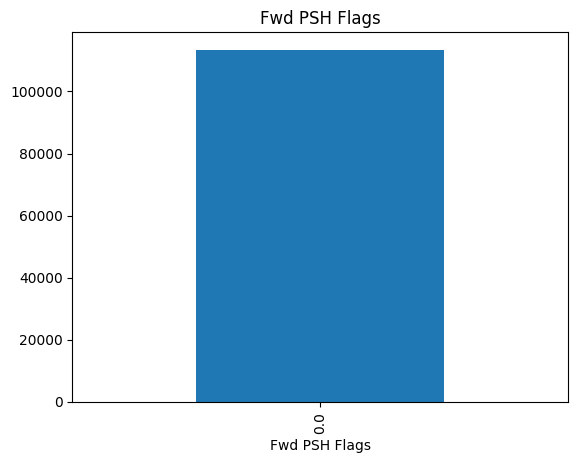

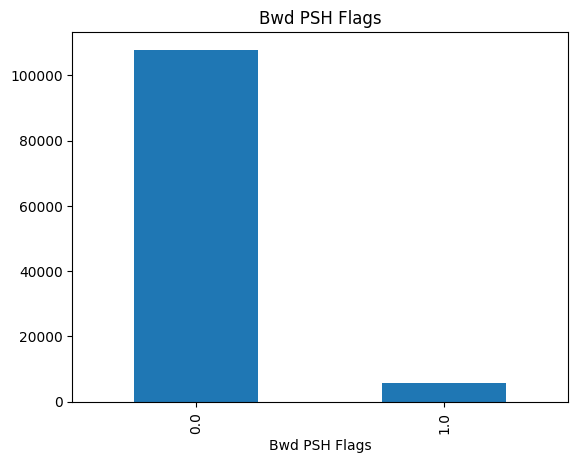

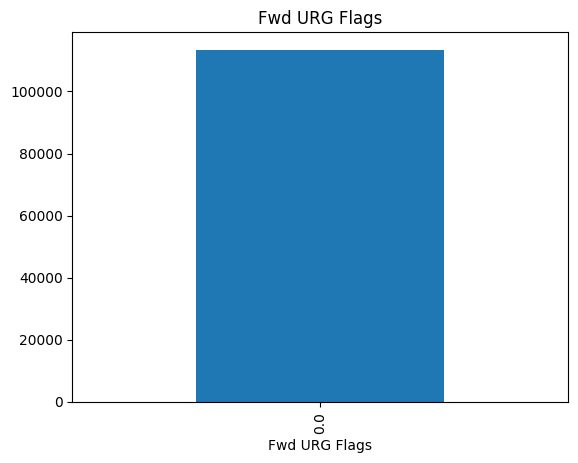

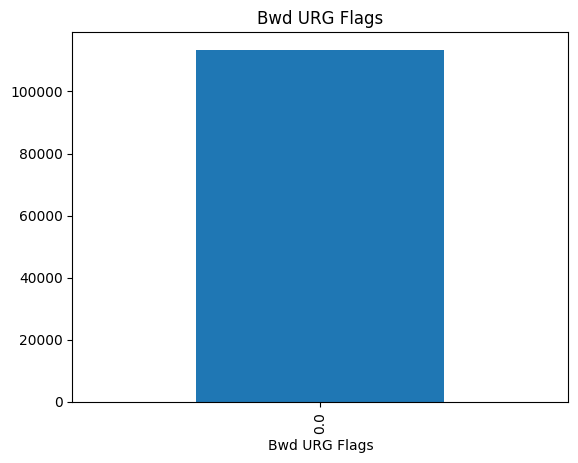

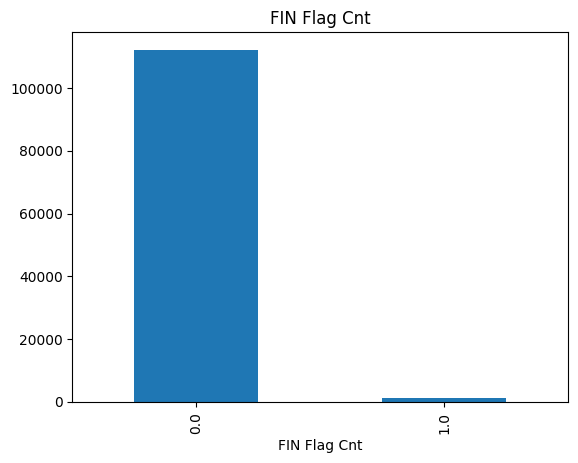

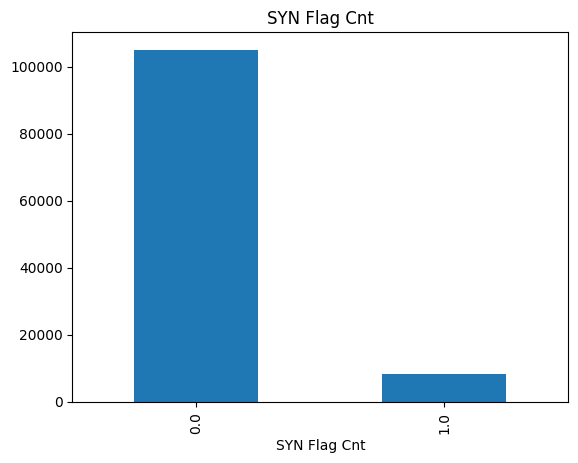

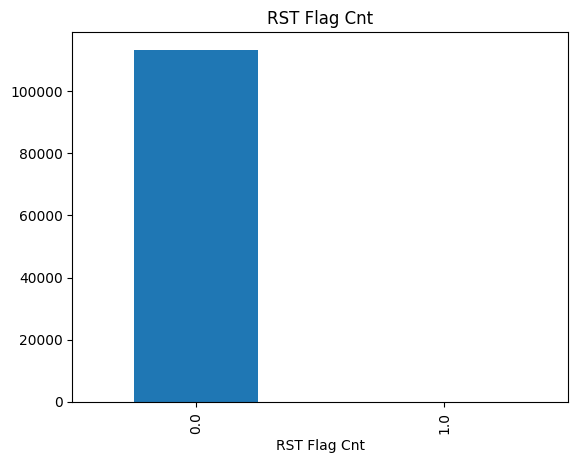

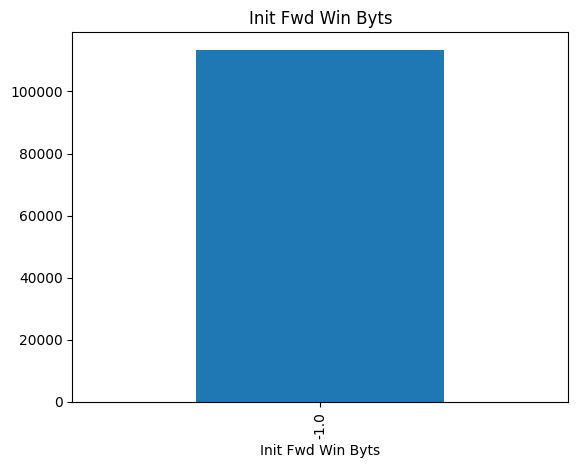

In [147]:
 # Arbitrary threshold for categories, checks and plots for cols with <20 unique vals
#counts occurrences of each unique value and plots a bar chart.
for col in X:
    if ddos[col].nunique()<20: 
        ddos[col].value_counts().plot(kind='bar') 
        plt.title(col)
        plt.show()

In [148]:
print(ddos['protocol'].unique())
print(ddos['Fwd PSH Flags'].unique())
print(ddos['Bwd PSH Flags'].unique())
print(ddos['Bwd URG Flags'].unique())
print(ddos['FIN Flag Cnt'].unique())
print(ddos['SYN Flag Cnt'].unique())
print(ddos['RST Flag Cnt'].unique())
print(ddos['Init Fwd Win Byts'].unique())

[ 1.  6. 17.  0.]
[0.]
[1. 0.]
[0.]
[0. 1.]
[0. 1.]
[0. 1.]
[-1.]


In [149]:
correlation = ddos.corr()

In [150]:
##CORRELATION ANALYSIS
print(correlation['Label'])

flow_duration       -0.317257
protocol            -0.836454
srcport             -0.793559
dstport             -0.381511
byte_count          -0.050068
packet_count        -0.096290
Tot Bwd Pkts        -0.057148
TotLen Fwd Pkts     -0.017013
TotLen Bwd Pkts     -0.044701
Fwd Pkt Len Std     -0.164362
Flow Pkts/s          0.383385
Fwd PSH Flags             NaN
Bwd PSH Flags       -0.292355
Fwd URG Flags             NaN
Bwd URG Flags             NaN
Fwd Header Len      -0.067356
Bwd Header Len      -0.059728
Pkt Len Var         -0.075117
FIN Flag Cnt        -0.132412
SYN Flag Cnt        -0.360613
RST Flag Cnt        -0.020854
Pkt Size Avg        -0.395267
Init Fwd Win Byts         NaN
Init Bwd Win Byts   -0.593834
Label                1.000000
Name: Label, dtype: float64


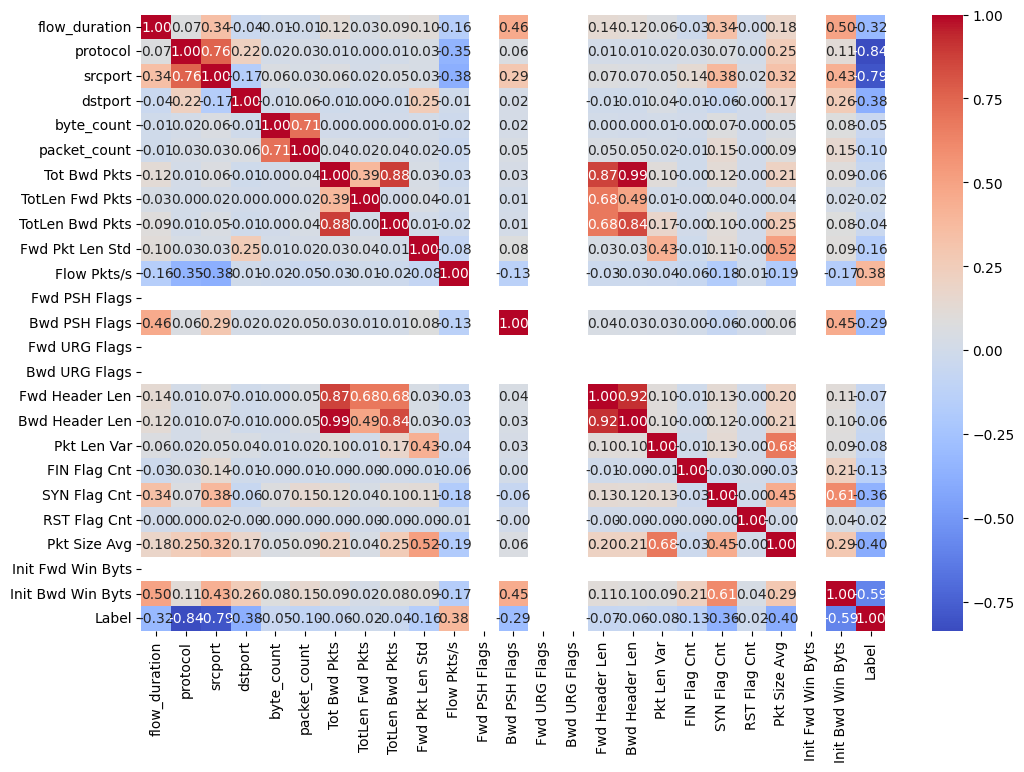

In [151]:
#PLOTTING HEATMAP
plt.figure(figsize=(12, 8))
sns.heatmap(correlation, annot=True, fmt='.2f', cmap='coolwarm')
plt.show()

PRE-PROCESSING

In [152]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [153]:
scaler=StandardScaler()

In [154]:
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

In [155]:
X_train

array([[-0.24806719, -0.65142601, -0.61829451, ..., -0.30692936,
         0.        , -0.46200231],
       [-0.24789071,  1.9866345 ,  1.45550717, ...,  0.33119401,
         0.        , -0.46200231],
       [-0.24805484,  1.9866345 , -0.61584681, ...,  0.3608053 ,
         0.        , -0.46200231],
       ...,
       [-0.2480654 , -0.65142601, -0.61829451, ..., -0.30692936,
         0.        , -0.46200231],
       [-0.24781107, -0.49624598, -0.61829451, ..., -0.29545498,
         0.        ,  2.18042816],
       [ 4.58800381,  0.27965417,  1.32176119, ..., -0.08839802,
         0.        ,  2.18042816]])

In [156]:
X_test

array([[-0.2480671 , -0.65142601, -0.61829451, ..., -0.30692936,
         0.        , -0.46200231],
       [-0.24806732, -0.65142601, -0.61829451, ..., -0.30692936,
         0.        , -0.46200231],
       [-0.24806697, -0.65142601, -0.61829451, ..., -0.30692936,
         0.        , -0.46200231],
       ...,
       [ 4.55313252,  0.27965417,  0.93530179, ...,  0.14949911,
         0.        ,  2.18042816],
       [-0.24706765,  1.9866345 ,  1.48224713, ...,  0.10170649,
         0.        , -0.46200231],
       [-0.2477559 ,  0.27965417, -0.59783544, ...,  3.54253873,
         0.        , -0.46196118]])

Model 1: MLP

In [157]:
!pip install tensorflow

In [158]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import Adam

MLP (MULTI-LAYER PERCEPTRON)

In [159]:
def build_MLP():
    model = Sequential([
        Dense(128, activation='relu', input_shape=(X_train.shape[1],)),
        ##128 neurons: First hidden layer.
        ##ReLU activation: Helps with non-linearity and avoids vanishing gradients.
        ##input_shape=(X_train.shape[1],): The number of features in the dataset.
        Dropout(0.5), ##Prevents overfitting by randomly turning off 30% of neurons during training.
        Dense(64, activation='relu'), ##Second hidden layer with 64 neurons.
        Dropout(0.3),
        Dense(32, activation='relu'), ##Third hidden layer with 32 neurons.
        Dense(1, activation='sigmoid') ##Output neuron (since we have binary classification: 0 or 1).
        ##Converts output into a probability (0 to 1), helping classify the attack type.
    ])
    optimizer= Adam(learning_rate=0.001)
    model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])
    return model
    ##Optimizer: Adam → Adaptive learning rate optimization.
    ##Loss: Binary Crossentropy → Since it's a binary classification problem.
    ##Metric: Accuracy → Used to measure model performance

In [160]:
MLP=build_MLP()


C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [161]:
history = MLP.fit(X_train, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test))

##PRINTING MODEL SUMMARY
MLP.summary()

Epoch 1/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 8s 2ms/step - accuracy: 0.9917 - loss: 0.0344 - val_accuracy: 0.9991 - val_loss: 0.0043
Epoch 2/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9994 - loss: 0.0039 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 3/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9997 - loss: 0.0024 - val_accuracy: 0.9992 - val_loss: 0.0038
Epoch 4/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9995 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0028
Epoch 5/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9996 - loss: 0.0021 - val_accuracy: 0.9993 - val_loss: 0.0041
Epoch 6/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9995 - loss: 0.0025 - val_accuracy: 0.9993 - val_loss: 0.0039
Epoch 7/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9996 - loss: 0.0024 - val_accuracy: 0.9993 - val_loss: 0.0032
Epoch 8/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 4s 2ms/step - accuracy: 0.9997 - loss: 0.0016 - 

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                     │ (None, 128)                 │           3,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_6 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_17 (Dense)                     │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_7 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_18 (Dense)                     │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_19 (Dense)                     │ (None, 1)                   │              33 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 40,709 (159.02 KB)

 Trainable params: 13,569 (53.00 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 27,140 (106.02 KB)

In [162]:
pred = MLP.predict(X_test)

709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step


In [163]:
binary_pred=(pred>0.5).astype(int)

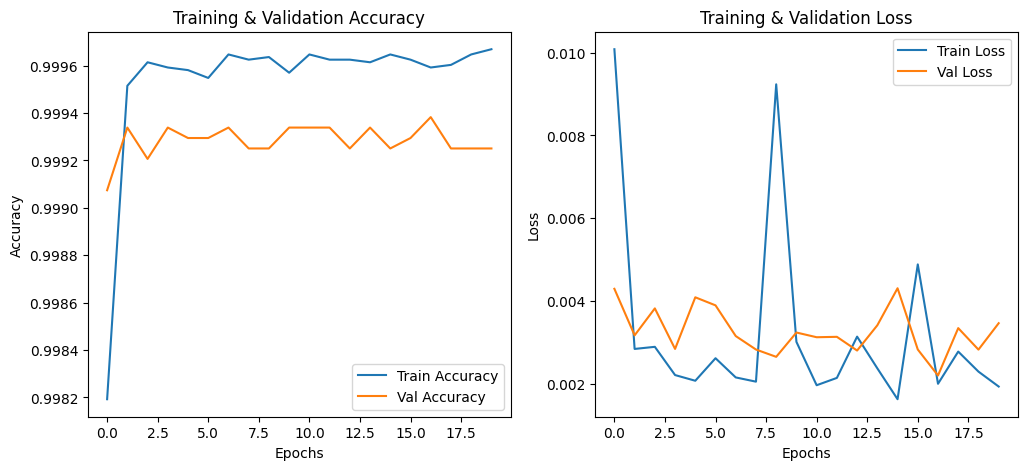

In [164]:
# test_case = X_test[0]  # Select first row
# test_case = test_case.reshape(1, -1)  # Reshape for model input
# # Predict probability
# prediction = MLP.predict(test_case)
# print(prediction)
plt.figure(figsize=(12, 5))

#PLOTTING ACCURACY
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

#PLOTTING LOSS
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

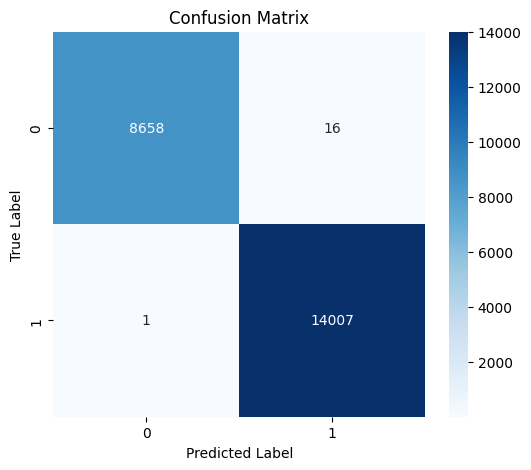

In [165]:
#PLOTTING CONFUSION MATRIX
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
cm = confusion_matrix(y_test, binary_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [166]:
accuracy = accuracy_score(y_test, binary_pred)
print(f"MODEL ACCURACY: {accuracy * 100:.2f}%\n")
print(classification_report(y_test, binary_pred))

MODEL ACCURACY: 99.93%

              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      8674
         1.0       1.00      1.00      1.00     14008

    accuracy                           1.00     22682
   macro avg       1.00      1.00      1.00     22682
weighted avg       1.00      1.00      1.00     22682



709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 841us/step
709/709 ━━━━━━━━━━━━━━━━━━━━ 1s 955us/step


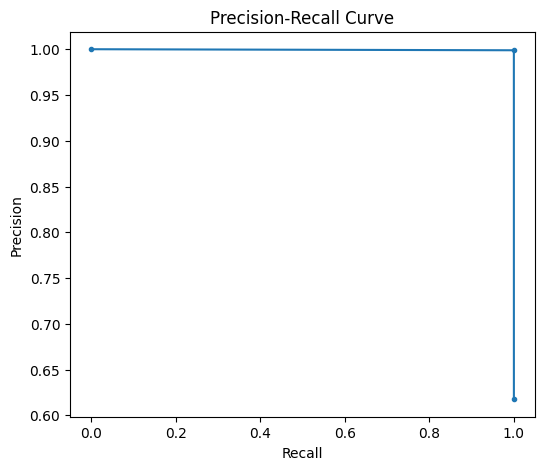

In [167]:
from sklearn.metrics import (roc_curve, auc, precision_recall_curve)
y_pred=(MLP.predict(X_test)>0.5).astype("int32")  #Convert probabilities to class labels
y_prob=MLP.predict(X_test).ravel()  #Flatten for evaluation

##PRECISION-RECALL CURVE
precision, recall, _ = precision_recall_curve(y_test, y_pred)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

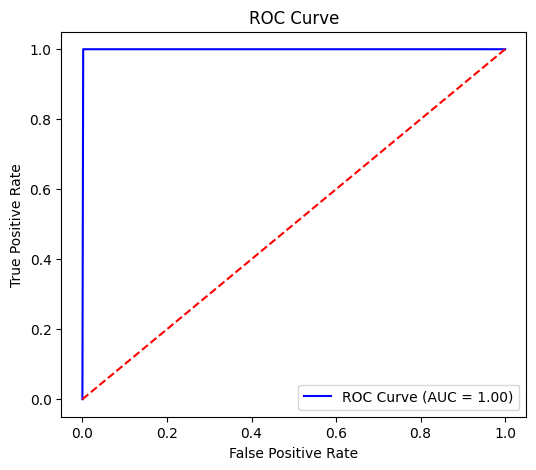

In [168]:
##ROC CURVE
fpr, tpr, _ = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

LSTM (LONG SHORT-TERM MEMORY)

In [169]:
from tensorflow.keras.layers import LSTM

def build_lstm():
    model=Sequential([
        LSTM(64, return_sequences=True, input_shape=(X_train.shape[1], 1)),
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1, activation='sigmoid')
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    return model

In [170]:
lstm=build_lstm()

C:\Users\ASUS\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [ ]:
X_train_reshaped = X_train.reshape(X_train.shape[0], X_train.shape[1], 1) ##lstm needs 3D input
X_test_reshaped = X_test.reshape(X_test.shape[0], X_test.shape[1], 1) ##lstm needs 3D input
history2=lstm.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test, y_test), verbose=1)
y_pred2=(lstm.predict(X_test_reshaped)>0.5).astype("int32")

Epoch 1/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 33s 10ms/step - accuracy: 0.9913 - loss: 0.0519 - val_accuracy: 0.9990 - val_loss: 0.0069
Epoch 2/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 27s 9ms/step - accuracy: 0.9992 - loss: 0.0058 - val_accuracy: 0.9991 - val_loss: 0.0036
Epoch 3/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 28s 10ms/step - accuracy: 0.9993 - loss: 0.0042 - val_accuracy: 0.9992 - val_loss: 0.0030
Epoch 4/20
2836/2836 ━━━━━━━━━━━━━━━━━━━━ 26s 9ms/step - accuracy: 0.9995 - loss: 0.0028 - val_accuracy: 0.9994 - val_loss: 0.0024
Epoch 5/20
 526/2836 ━━━━━━━━━━━━━━━━━━━━ 21s 9ms/step - accuracy: 0.9998 - loss: 0.0017

In [ ]:
#PLOTTING MODEL SUMMARY
lstm.summary()

In [ ]:
pred2=lstm.predict(X_test_reshaped)

In [ ]:
binary_pred2=(pred2>0.5).astype(int)

In [ ]:
plt.figure(figsize=(12, 5))

#PLOT ACCURACY
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'], label='Train Accuracy')
plt.plot(history2.history['val_accuracy'], label='Val Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training & Validation Accuracy')
plt.legend()

#PLOTTING LOSS
plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'], label='Train Loss')
plt.plot(history2.history['val_loss'], label='Val Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training & Validation Loss')
plt.legend()

plt.show()

In [ ]:
cm = confusion_matrix(y_test, binary_pred2)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
accuracy = accuracy_score(y_test, binary_pred2)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")
print(classification_report(y_test, binary_pred2))

In [ ]:
y_pred2=(lstm.predict(X_test_reshaped)>0.5).astype("int32")  # Convert probabilities to class labels
y_prob2=lstm.predict(X_test_reshaped).ravel()  # Flatten for evaluation

In [ ]:
##Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred2)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [ ]:
##ROC Curve
fpr, tpr, _=roc_curve(y_test, y_pred2)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

CNN (CONVOLUTIONAL NEURAL NETWORKS)

In [ ]:
from tensorflow.keras.layers import Conv1D, Flatten, MaxPooling1D, BatchNormalization

def build_CNN():
    model=Sequential([
        # Conv1D(filters=64, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        # BatchNormalization(),
        # Conv1D(filters=128, kernel_size=3, activation='relu'),
        # BatchNormalization(),
        # Flatten(),
        # Dense(64, activation='relu'),
        # Dropout(0.3),
        # Dense(32, activation='relu'),
        # Dropout(0.2),
        # Dense(1, activation='sigmoid')  # Binary Classification
    # ])
        Conv1D(32, kernel_size=3, activation='relu', input_shape=(X_train.shape[1], 1)),
        MaxPooling1D(pool_size=2),
        Conv1D(64, kernel_size=3, activation='relu'),
        MaxPooling1D(pool_size=2),
        Flatten(),
        Dense(64, activation='relu'),
        Dense(1, activation='sigmoid')  # Binary classification
    ])
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
    
#Train Model
    history = model.fit(X_train_reshaped, y_train, epochs=20, batch_size=32, validation_data=(X_test_reshaped, y_test))
#Evaluate Model
    test_loss, test_acc = model.evaluate(X_test_reshaped, y_test)
    print(f"Test Accuracy: {test_acc:.4f}")
    return model

In [ ]:
cnn=build_CNN()

In [ ]:
pred3=cnn.predict(X_test_reshaped)

In [ ]:
cnn.summary()

In [ ]:
#Predictions & Probabilities
y_pred3 = (cnn.predict(X_test_reshaped) > 0.5).astype("int32")  # Convert probabilities to class labels
y_prob3 = cnn.predict(X_test_reshaped).ravel()  # Flatten for evaluation

#Confusion Matrix
cm = confusion_matrix(y_test, y_pred3)
plt.figure(figsize=(6,5))
sns.heatmap(cm, annot=True, fmt='d', cmap="Blues", xticklabels=[0,1], yticklabels=[0,1])
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

#Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred3)
plt.figure(figsize=(6,5))
plt.plot(recall, precision, marker='.')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

#ROC Curve & AUC
fpr, tpr, _ = roc_curve(y_test, y_pred3)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6,5))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

#Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred3))